In [2]:
## 필요모듈 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.applications import VGG16

In [3]:
file_list = glob('train/*.jpg')

In [4]:
## 파일 만들기
X = np.zeros((len(file_list),150,150,3))
y = []
for idx, file in enumerate(file_list):
    tmp = cv2.imread(file)
    tmp = cv2.resize(tmp,(150,150))
    X[idx] = tmp
    if 'cat' in file:
        y.append(0)
    else:
        y.append(1)
y = np.array(y).reshape(-1,1)

In [5]:
idx = np.random.choice(np.arange(4000),4000,replace=False)

In [6]:
X = X[idx]
y = y[idx]
X_train = X[:3200]
y_train = y[:3200]
X_test = X[3200:]
y_test = y[3200:]

In [7]:
pre_conv = VGG16(include_top=False,
                 input_shape=(150,150,3))

In [8]:
model = Sequential(
    [
        Flatten(),
        Dense(256,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

In [10]:
X_train = pre_conv.predict(X_train)
model.fit(
    X_train,
    y_train,
    epochs=8
)

100/100 [==============================] - 307s 3s/step
Epoch 1/8
100/100 [==============================] - 3s 21ms/step - loss: 4.2501 - accuracy: 0.9056
Epoch 2/8
100/100 [==============================] - 2s 23ms/step - loss: 0.3790 - accuracy: 0.9644
Epoch 3/8
100/100 [==============================] - 2s 24ms/step - loss: 0.1662 - accuracy: 0.9831
Epoch 4/8
100/100 [==============================] - 2s 22ms/step - loss: 0.1282 - accuracy: 0.9894
Epoch 5/8
100/100 [==============================] - 2s 21ms/step - loss: 0.1511 - accuracy: 0.9887
Epoch 6/8
100/100 [==============================] - 2s 22ms/step - loss: 0.0254 - accuracy: 0.9956
Epoch 7/8
100/100 [==============================] - 2s 23ms/step - loss: 0.0488 - accuracy: 0.9962
Epoch 8/8
100/100 [==============================] - 2s 24ms/step - loss: 0.0386 - accuracy: 0.9959


In [20]:
def image_predict(x):
    dt = cv2.imread(x)
    plt.imshow(dt)
    plt.show()
    dt = cv2.resize(dt,(150,150))
    dt = dt.reshape(1,150,150,3)
    dt = pre_conv.predict(dt)
    return np.where(model.predict(dt) >0.5,'강아지','고양이')[0]

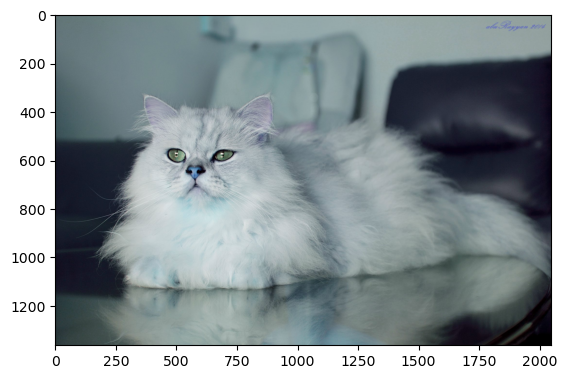

1/1 [==============================] - 0s 32ms/step


array(['고양이'], dtype='<U3')

In [22]:
image_predict('1.jpg')

In [ ]:
from tensorflow.keras import initializers

In [63]:
from tensorflow.keras.layers import InputLayer

In [76]:
pre_conv.get_config()['layers'][0]

{'class_name': 'InputLayer',
 'config': {'batch_input_shape': (None, 150, 150, 3),
  'dtype': 'float32',
  'sparse': False,
  'ragged': False,
  'name': 'input_1'},
 'name': 'input_1',
 'inbound_nodes': []}

In [129]:
#pre_conv.get_config()['layers'][5]['class_name']
layer_dict = {
    'InputLayer':InputLayer,
    'Conv2D':Conv2D,
    'MaxPooling2D':MaxPooling2D
}
layers = []
for idx in range(len(pre_conv.get_config()['layers'])):
    layer = pre_conv.get_config()['layers'][idx]['class_name']
    param = pre_conv.get_config()['layers'][idx]['config']
    layers.append(layer_dict[layer](**param))

layers.extend([Flatten(),
               Dense(256,activation='relu'),
               Dense(1,activation='sigmoid')
              ])

In [130]:
dog_cat_model = Sequential(layers)

In [126]:
pre_conv.layers[i]

In [137]:
for i in range(len(pre_conv.layers)):
    try:
        dog_cat_model.layers[i].set_weights(pre_conv.layers[i+1].get_weights())
        print(i)
    except:
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [139]:
for i in range(len(model.layers)):
    dog_cat_model.layers[18+i].set_weights(model.layers[i].get_weights())

In [140]:
dog_cat_model.save('model/cat_dog_model.h5')

In [114]:
dog_cat_model.layers[19].set_weights(model.layers[1].get_weights())
dog_cat_model.layers[20].set_weights(model.layers[2].get_weights())

In [115]:
model.save('model/model.h5')

In [116]:
model1 = load_model('model/model.h5')

In [118]:
model.save('model/model.h6')

INFO:tensorflow:Assets written to: model/model.h6\assets


INFO:tensorflow:Assets written to: model/model.h6\assets


In [117]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.layers[1].get_weights()[0]

[array([[ 0.01706892, -0.00171482, -0.00789048, ..., -0.03854854,
         -0.02190124,  0.02460717],
        [ 0.01945491, -0.00705783,  0.0136335 , ...,  0.00974436,
         -0.01680687,  0.01091997],
        [ 0.01470227,  0.00474995, -0.01777842, ..., -0.00884138,
         -0.02071565,  0.02151788],
        ...,
        [-0.01918173,  0.02002052, -0.00741984, ..., -0.00124854,
         -0.01035956, -0.02652767],
        [ 0.00374485, -0.02010573, -0.02080121, ..., -0.00210336,
          0.02676938, -0.01776519],
        [-0.02168257, -0.00970966, -0.02529366, ..., -0.01230083,
          0.00735616, -0.01536716]], dtype=float32),
 array([-1.03531526e-02, -3.76148312e-03, -5.25763165e-03, -3.71689629e-03,
         3.11843492e-03, -3.70284985e-03, -5.63388132e-03, -5.37881255e-03,
        -1.27824850e-03, -5.81826922e-03, -5.03702881e-03, -2.05531740e-03,
         4.03715111e-03, -2.89875286e-04, -1.46225635e-02, -7.00787734e-03,
        -3.27904406e-03,  1.48262756e-04, -6.27692789e

In [84]:
layer = pre_conv.get_config()['layers'][idx]['class_name']

In [85]:
layer

'InputLayer'

In [72]:
test_model = Sequential(
    test
)

In [73]:
test_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [50]:
pre_conv.get_config()['layers'][5]

{'class_name': 'Conv2D',
 'config': {'name': 'block2_conv2',
  'trainable': True,
  'dtype': 'float32',
  'filters': 128,
  'kernel_size': (3, 3),
  'strides': (1, 1),
  'padding': 'same',
  'data_format': 'channels_last',
  'dilation_rate': (1, 1),
  'groups': 1,
  'activation': 'relu',
  'use_bias': True,
  'kernel_initializer': {'class_name': 'GlorotUniform',
   'config': {'seed': None}},
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'kernel_regularizer': None,
  'bias_regularizer': None,
  'activity_regularizer': None,
  'kernel_constraint': None,
  'bias_constraint': None},
 'name': 'block2_conv2',
 'inbound_nodes': [[['block2_conv1', 0, 0, {}]]]}

In [44]:
pre_conv.get_config()['layers']
cat_dog_model = Sequential(
    [
        Conv2D(filters=64,
               kernel_size=(3,3),
               strides=(1,1),
               padding='same',
               activation='relu',
               input_shape=(150,150,3)),
        Conv2D(filters=64,
               kernel_size=(3,3),
              strides=(1,1),
              padding='same',
              activation='relu'),
        MaxPooling2D(pool_size=(2,2),
                     padding='valid',
                     strides=(2,2)),
        Conv2D(128,
               kernel_size=(3,3),
               strides=(1,1),
               padding='same',
               activation='relu'
              ),
        Conv2D()
    ]
)

In [46]:
cat_dog_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [47]:
pre_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     